In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
PATH = "/Users/jahyeon_gu/Downloads/archive"

df = pd.read_csv('/Users/jahyeon_gu/Downloads/all.csv')
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix_x', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_zip_code_prefix_y', 'seller_city', 'seller_state'],
      dtype='object')

In [3]:
df = df[['order_id', 
'customer_id', 
'order_status', 
'order_purchase_timestamp',
'order_approved_at',
'order_delivered_carrier_date',
'order_delivered_customer_date',
'order_estimated_delivery_date',
'order_item_id',
'product_id', 
'seller_id', 
'shipping_limit_date',
'price', 
'freight_value', 
'payment_sequential', 
'payment_type',
'payment_installments', 
'payment_value', 
'review_id', 
'review_score',
'review_comment_title', 
'review_comment_message',
'review_creation_date', 
'review_answer_timestamp', 
'customer_unique_id',
'customer_zip_code_prefix_x', 
'customer_city', 
'customer_state',
'product_category_name',
'customer_zip_code_prefix_y', 
'seller_city', 
'seller_state']]

In [4]:
b = pd.read_csv(f"{PATH}/product_category_name_translation.csv")
b.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
df = df.merge(b)

# 주문 취소건은 매출 합계에 포함되지 않도록 제거
condition = df["order_status"] != "canceled"

df = df.loc[condition, :]

array(['delivered', 'shipped', 'invoiced', 'processing', 'approved',
       'unavailable'], dtype=object)

In [11]:
# 연-월을 추출하기 위해 datetime으로 타입 변경
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["year_month"] = df["order_purchase_timestamp"].dt.strftime('%Y-%m')
df[["order_purchase_timestamp", "year_month"]].sample(2)
df = df.sort_values("year_month")
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english,year_month
49282,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,3.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
49281,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
49280,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,1.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
33942,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,2.0,f293394c72c9b5fafd7023301fc21fc2,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09
33912,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,1.0,c1488892604e4ba5cff5b4eb4d595400,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30410,8d87a1565de3eff8cb87fcacd8ba101b,38fa2c2a1a69a2448ae63b3aced4d39d,delivered,2018-08-04 13:32:22,2018-08-04 13:45:17,2018-08-06 18:18:00,2018-08-10 17:48:53,2018-08-17 00:00:00,2.0,8814a3da37fb9673a5ac06f82a2a00a9,...,1181dc19b5bc200ecadf0b8a28523092,3351,sao paulo,SP,moveis_decoracao,14940.0,ibitinga,SP,furniture_decor,2018-08
84321,fd6508408ae641784eec9008b9c351d1,cfec05b8c098a72ba2db50395843abdb,delivered,2018-08-05 08:29:26,2018-08-07 04:30:25,2018-08-07 15:30:00,2018-08-13 13:50:40,2018-08-20 00:00:00,1.0,ed2067a9c1f79553088a3c67b99a9f97,...,d8207d7cb28c86f2ccad85df4ed42dc6,83750,lapa,PR,alimentos,15081.0,sao jose do rio preto,SP,food,2018-08
84350,95bdb86dcfd0b17e0923fb8740f18e35,fda46ced682d0ada68b040066545388f,delivered,2018-08-22 13:43:32,2018-08-22 13:55:18,2018-08-23 15:32:00,2018-08-29 18:58:49,2018-09-04 00:00:00,1.0,ed2067a9c1f79553088a3c67b99a9f97,...,8e0726e0bd499f17523ed58fa5357913,17380,brotas,SP,alimentos,15081.0,sao jose do rio preto,SP,food,2018-08
84136,292362d65fdd556daf473eaeaa487a06,563b025cf608c075c839476181971894,delivered,2018-08-07 09:52:37,2018-08-07 10:05:10,2018-08-10 12:29:00,2018-08-14 00:26:29,2018-08-10 00:00:00,1.0,89321f94e35fc6d7903d36f74e351d40,...,a724576ad7a63c339210b9e6d6d5c0e5,13468,americana,SP,alimentos,12940.0,atibaia,SP,food,2018-08


In [13]:
date = df[["order_purchase_timestamp", "order_estimated_delivery_date"]]
date

,order_purchase_timestamp,order_estimated_delivery_date
49282,2016-09-15 12:16:38,2016-10-04 00:00:00
49281,2016-09-15 12:16:38,2016-10-04 00:00:00
49280,2016-09-15 12:16:38,2016-10-04 00:00:00
33942,2016-09-04 21:15:19,2016-10-20 00:00:00
33912,2016-09-04 21:15:19,2016-10-20 00:00:00
...,...,...
30410,2018-08-04 13:32:22,2018-08-17 00:00:00
84321,2018-08-05 08:29:26,2018-08-20 00:00:00
84350,2018-08-22 13:43:32,2018-09-04 00:00:00
84136,2018-08-07 09:52:37,2018-08-10 00:00:00


In [23]:
date["order_estimated_delivery_date"] = pd.to_datetime(date["order_estimated_delivery_date"]).dt.strftime("%Y-%m-%d")
date["order_purchase_timestamp"] = pd.to_datetime(date["order_purchase_timestamp"]).dt.strftime("%Y-%m-%d")
date["order_estimated_delivery_date"] = pd.to_datetime(date["order_estimated_delivery_date"])
date["order_purchase_timestamp"] = pd.to_datetime(date["order_purchase_timestamp"])
(date["order_estimated_delivery_date"] - date["order_purchase_timestamp"]).describe()

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_68095/2452503330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date["order_estimated_delivery_date"] = pd.to_datetime(date["order_estimated_delivery_date"]).dt.strftime("%Y-%m-%d")
/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_68095/2452503330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date["order_purchase_timestamp"] = pd.to_datetime(date["order_purchase_timestamp"]).dt.strftime("%Y-%m-%d")
/var/folders/ql/gbsdt1191mbf_h

count                        116023
mean     24 days 12:24:13.242891495
std       8 days 20:49:07.317495652
min                 3 days 00:00:00
25%                19 days 00:00:00
50%                24 days 00:00:00
75%                29 days 00:00:00
max               156 days 00:00:00
dtype: object

In [26]:
date = df[["order_purchase_timestamp", "order_delivered_customer_date"]]
date = date.dropna()
date

,order_purchase_timestamp,order_delivered_customer_date
49282,2016-09-15 12:16:38,2016-11-09 07:47:38
49281,2016-09-15 12:16:38,2016-11-09 07:47:38
49280,2016-09-15 12:16:38,2016-11-09 07:47:38
3975,2016-10-10 07:53:34,2016-10-17 12:03:38
55703,2016-10-05 15:08:00,2016-10-13 15:44:27
...,...,...
99761,2018-08-15 20:49:33,2018-08-18 16:06:45
30410,2018-08-04 13:32:22,2018-08-10 17:48:53
84321,2018-08-05 08:29:26,2018-08-13 13:50:40
84350,2018-08-22 13:43:32,2018-08-29 18:58:49


In [27]:
date["order_delivered_customer_date"] = pd.to_datetime(date["order_delivered_customer_date"]).dt.strftime("%Y-%m-%d")
date["order_purchase_timestamp"] = pd.to_datetime(date["order_purchase_timestamp"]).dt.strftime("%Y-%m-%d")
date["order_delivered_customer_date"] = pd.to_datetime(date["order_delivered_customer_date"])
date["order_purchase_timestamp"] = pd.to_datetime(date["order_purchase_timestamp"])
(date["order_delivered_customer_date"] - date["order_purchase_timestamp"]).describe()

count                        114054
mean     12 days 10:11:16.858330264
std       9 days 10:48:31.557362605
min                 0 days 00:00:00
25%                 7 days 00:00:00
50%                10 days 00:00:00
75%                16 days 00:00:00
max               210 days 00:00:00
dtype: object

In [30]:
df["order_status"].unique()

array(['delivered', 'shipped', 'invoiced', 'unavailable', 'processing',
       'approved'], dtype=object)

In [39]:
list(df.groupby("product_category_name_english").agg({"price":"sum"}).sort_values("price", ascending=False).head(8).index)

['health_beauty',
 'watches_gifts',
 'bed_bath_table',
 'sports_leisure',
 'computers_accessories',
 'furniture_decor',
 'housewares',
 'cool_stuff']

In [65]:
top10_city = list(df.groupby("customer_city").agg({"order_id":"nunique"}).sort_values("order_id", ascending=False).head(10).index)
top10_city

['sao paulo',
 'rio de janeiro',
 'belo horizonte',
 'brasilia',
 'curitiba',
 'campinas',
 'porto alegre',
 'salvador',
 'guarulhos',
 'sao bernardo do campo']

In [93]:
for i in range(len(top10_city)):
    condition = df["customer_city"] == top10_city[i]
    temp = df.loc[condition, :]
    temp = temp.groupby("product_category_name_english").agg({"order_id":"nunique"}).sort_values("order_id", ascending=False).reset_index().head(10)
    print(set(temp["product_category_name_english"].unique()))

{'telephony', 'auto', 'housewares', 'bed_bath_table', 'furniture_decor', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
{'housewares', 'garden_tools', 'cool_stuff', 'furniture_decor', 'bed_bath_table', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
{'auto', 'housewares', 'garden_tools', 'bed_bath_table', 'furniture_decor', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
{'telephony', 'auto', 'housewares', 'watches_gifts', 'bed_bath_table', 'sports_leisure', 'furniture_decor', 'health_beauty', 'toys', 'computers_accessories'}
{'telephony', 'housewares', 'cool_stuff', 'bed_bath_table', 'furniture_decor', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
{'telephony', 'housewares', 'garden_tools', 'furniture_decor', 'bed_bath_table', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
{'telephony', 'housewares'

In [94]:
a = {'telephony', 'auto', 'housewares', 'bed_bath_table', 'furniture_decor', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
b = {'housewares', 'garden_tools', 'cool_stuff', 'furniture_decor', 'bed_bath_table', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
c = {'auto', 'housewares', 'garden_tools', 'bed_bath_table', 'furniture_decor', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
d = {'telephony', 'auto', 'housewares', 'watches_gifts', 'bed_bath_table', 'sports_leisure', 'furniture_decor', 'health_beauty', 'toys', 'computers_accessories'}
e = {'telephony', 'housewares', 'cool_stuff', 'bed_bath_table', 'furniture_decor', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
f = {'telephony', 'housewares', 'garden_tools', 'furniture_decor', 'bed_bath_table', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}
g = {'telephony', 'housewares', 'cool_stuff', 'garden_tools', 'furniture_decor', 'bed_bath_table', 'sports_leisure', 'watches_gifts', 'health_beauty', 'computers_accessories'}
h = {'telephony', 'auto', 'housewares', 'garden_tools', 'furniture_decor', 'bed_bath_table', 'sports_leisure', 'watches_gifts', 'health_beauty', 'computers_accessories'}
i = {'telephony', 'auto', 'housewares', 'cool_stuff', 'watches_gifts', 'bed_bath_table', 'sports_leisure', 'furniture_decor', 'health_beauty', 'computers_accessories'}
j = {'telephony', 'auto', 'housewares', 'furniture_decor', 'bed_bath_table', 'sports_leisure', 'watches_gifts', 'health_beauty', 'toys', 'computers_accessories'}

In [95]:
a & b & c & d & e & f & g & h & i & j

{'bed_bath_table',
 'computers_accessories',
 'furniture_decor',
 'health_beauty',
 'housewares',
 'sports_leisure',
 'watches_gifts'}

In [100]:
temp = temp.groupby("product_category_name_english").agg({"order_id":"nunique"}).sort_values("order_id", ascending=False).reset_index().head(10)
list(temp["product_category_name_english"].unique())

['auto',
 'bed_bath_table',
 'computers_accessories',
 'furniture_decor',
 'health_beauty',
 'housewares',
 'sports_leisure',
 'telephony',
 'toys',
 'watches_gifts']

Text(0.5, 0, '주문량')

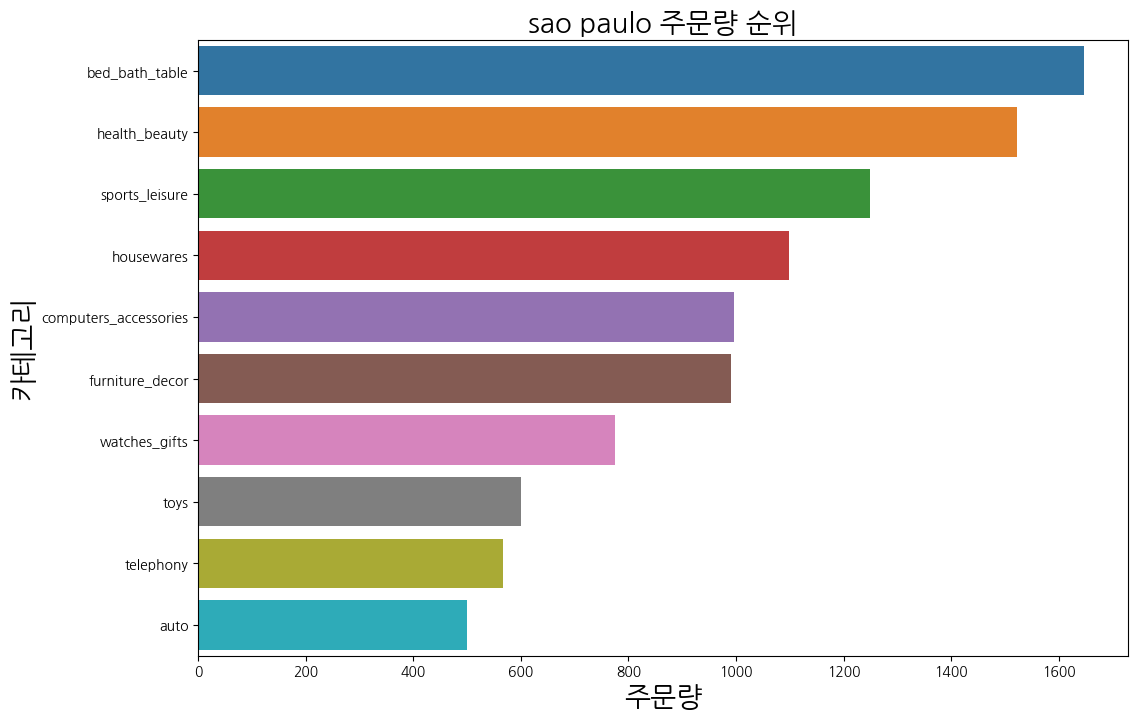

In [89]:
plt.figure(figsize=(12, 8))
sns.barplot(data=temp, y="product_category_name_english", x="order_id").set_title(f"{top10_city[0]} 주문량 순위", fontsize=20)
plt.ylabel('카테고리', fontsize=20)
plt.xlabel('주문량', fontsize=20)

<AxesSubplot: xlabel='product_category_name_english'>

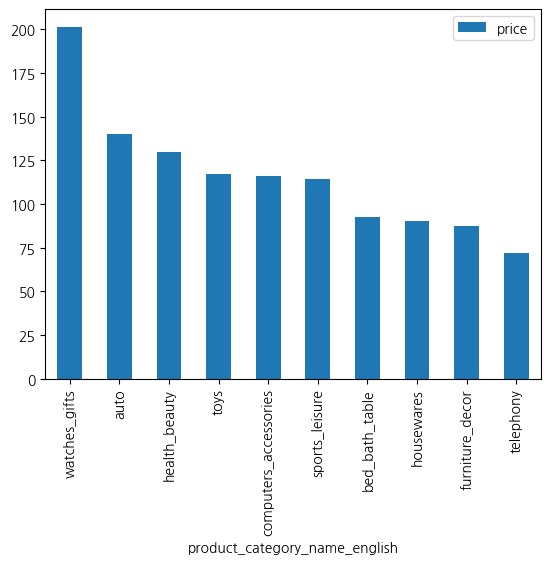

In [107]:
df.groupby("product_category_name_english").agg({"price":"mean"}).loc[list(temp["product_category_name_english"].unique()), :].sort_values("price", ascending=False).plot(kind="bar")